# Predicting Stock Success Using Tensorflow

### Basic Imports

In [8]:
import pandas as pd #Data Frames
import numpy as np #Calulations 

import yfinance as yf #API for Stock prices

### Data Collection

In [9]:
#Yfinance has no list for tickers that I can use. I will have to make my own list, taking from NASDAQ


#This is the website where I dowloaded the CSV file:
#https://www.nasdaq.com/market-activity/stocks/screener
data = pd.read_csv("C:\\Users\\Total\\OneDrive\\Desktop\\yfinanceProject\\nasdaq_screener_1715809493768.csv")
data = data.loc[data["Country"] == "United States"] #Selecting Comanies based in the USA to put less stress on the model.
new_data = list(data["Symbol"]) # this is the column with the tickers.

data.head(5)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$154.08,2.8000,1.851%,4.515396e+10,United States,1999.0,1524628,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$40.04,0.2100,0.527%,7.189570e+09,United States,2016.0,5689146,Industrials,Aluminum
3,AACI,Armada Acquisition Corp. I Common Stock,$11.37,-0.0300,-0.263%,0.000000e+00,United States,2021.0,31365,Finance,Blank Checks
4,AACIU,Armada Acquisition Corp. I Unit,$11.43,0.3200,2.88%,0.000000e+00,United States,2021.0,100,Finance,Blank Checks
5,AACIW,Armada Acquisition Corp. I Warrant,$0.12,-0.0101,-7.763%,0.000000e+00,United States,2021.0,6669,Finance,Blank Checks


### Data Processing

In [10]:
def normalize(l):
    """
    l: (list) 
    This function simplifies all the values to a decimal between 0 and 1.
    This lets the model treat data from a huge company and a smaller company the same.
    """
    lbound = np.min(l)
    tbound = np.max(l)
    ans = (l - lbound) / (tbound - lbound) #this is the method I am using to normalize the data. It is called min max normalization.
    ans = np.round(ans * 100)
    ans = ans / 100
    return ans

</p>The computer will take two years from the stock data as training data, and the last year to determine if it was successfull or not. </p>
<p>To use this model, we can input the last two years or 503 busness days to output how well the computer thinks the stock will do.</p>

In [11]:
blacklist = ["ECC           ","IGTAR","IROHR","MARXR","MCAGR","MSSAR","NNAGR","PLTNR","QETAR","RWODR","SFB","TENKR","TMTCR","WINVR","WTMAR"] 
#these are tickers that are in the NASDAQ CSV file but not in yfinance

graphs = [] #where Stock history goes
tickers = [] #stores the tickers
answers = [] #this list holds ones for stocks that went up and zeros for stocks that went down

for x,i in enumerate(new_data): 
    #prints out progress through the stocks
    if x % 100 == 0:
        print(str(x) + "/" + str(len(new_data)), end = " ")
        if x % 1000 == 0 and x != 0:
            print("")
    
    #feeds data into the lists.
    try:
        if "^" in i or "/" in i or str(i) in blacklist:
            #filtering through stocks not in yfinance
            continue
        curr_data = yf.Ticker(str(i)).history(period="3y")
        if len(list(curr_data["High"])) >=756 and not True in np.isnan(list(curr_data["High"])):
            #checks if the stock is old enough and not bugged
            graphs.append(normalize(np.array(curr_data["High"])[0:503]))
            temp_data = normalize(list(curr_data["High"]))
            if temp_data[-503] * 1.2  < temp_data[-1]:
                answers.append(1)
            else:
                answers.append(0)
        tickers.append(i)
    except:
        print("Something went wrong!")
graphs = np.array(graphs)
answers = np.array(answers)

0/5483 100/5483 200/5483 300/5483 400/5483 500/5483 600/5483 700/5483 800/5483 900/5483 1000/5483 
1100/5483 

CNFRZ: Period '3y' is invalid, must be one of ['1d', '5d']


1200/5483 1300/5483 1400/5483 1500/5483 

EAI: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


1600/5483 

EMCGR: Period '3y' is invalid, must be one of ['1d', '5d']
EMP: Period '3y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


1700/5483 

ESHAR: Period '3y' is invalid, must be one of ['1d', '5d']


1800/5483 1900/5483 

FLFVR: Period '3y' is invalid, must be one of ['1d', '5d']


2000/5483 


GBBKR: Period '3y' is invalid, must be one of ['1d', '5d']
GECCZ: Period '3y' is invalid, must be one of ['1d', '5d']


2100/5483 

GLLIR: Period '3y' is invalid, must be one of ['1d', '5d']


2200/5483 2300/5483 2400/5483 

IBACR: Period '3y' is invalid, must be one of ['1d', '5d']


2500/5483 2600/5483 2700/5483 2800/5483 2900/5483 3000/5483 
3100/5483 3200/5483 3300/5483 3400/5483 3500/5483 3600/5483 3700/5483 3800/5483 3900/5483 4000/5483 
4100/5483 4200/5483 4300/5483 4400/5483 4500/5483 4600/5483 4700/5483 4800/5483 4900/5483 5000/5483 
5100/5483 5200/5483 5300/5483 5400/5483 

### Data Visualization

Specific data presentation

The blue line is what the computer gets to determine the success of the stock. The orange is what the computer does not see.
This paticular test case would tell the computer to invest, as the orange line ends above where it started.
We will tell the computer that this stock is not good to invest
Stock at the start of the year: 10.25 Stock at the end of the year: 11.45989990234375


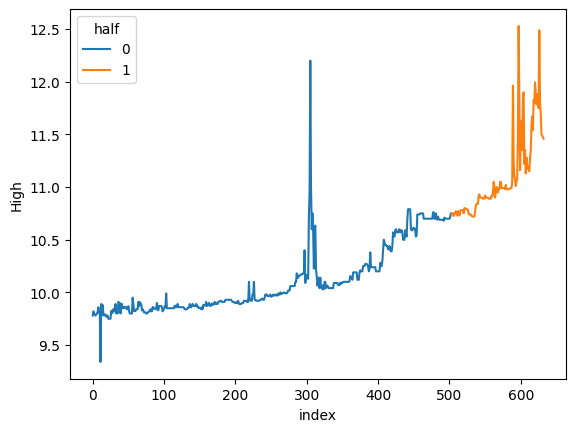

In [14]:
#this shows training data and result
import seaborn as sns
example = 2
#change this to see other graphs
vis_data = yf.Ticker(str(new_data[example])).history("3y")
vis_data = pd.DataFrame(vis_data).reset_index()["High"]
vis_data = vis_data.reset_index()
data = (([0] * 503) + ([1] * 252))[0:len(list(vis_data["High"]))]
vis_data["half"] = data
sns.lineplot(data = vis_data,x = "index",y = "High",hue = "half")
print("The blue line is what the computer gets to determine the success of the stock. The orange is what the computer does not see.\nThis paticular test case would tell the computer to invest, as the orange line ends above where it started.")
temp_data = list(vis_data["High"])
if temp_data[-252]  > temp_data[-1]:
    print("We will tell the computer that this stock is good to invest")
else:
    print("We will tell the computer that this stock is not good to invest")
print("Stock at the start of the year: " + str(temp_data[-252]) , "Stock at the end of the year: " + str(temp_data[-1]))

Veiw a random graph

Ticker for this graph: OCCIN
1 to invest 0 to not invest: 1


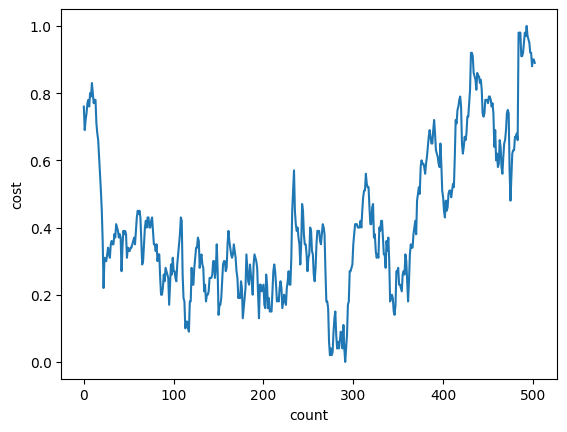

In [16]:
import seaborn as sns
import random
example = random.randint(0,len(graphs)-2)
graph_data = pd.DataFrame(graphs[example]).reset_index().rename(columns = {"index":"count",0: "cost"})
plot = sns.lineplot(data = graph_data,x = "count",y = "cost")
print("Ticker for this graph: " + tickers[example])
print("1 to invest 0 to not invest: " + str(answers[example]))


### Training model

In [17]:
X = graphs #all avalibe training data
y = np.array(answers) # all answers for the training data

#using sklearn to split the data
import sklearn
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, Ytrain, ytest = train_test_split(X,y,random_state=28,test_size=.1)
#training input, testing input, training output, testing expected output

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#nural network for the model
model = Sequential([
    tf.keras.Input(shape=(503,)),
    #size of array for two years
    Dense(50,activation= "relu"),
    Dense(20,activation = "relu"),
    Dense(10,activation = "relu"),
    Dense(1,activation = "sigmoid")
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    #answers with 0 to 1
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

In [19]:
model.fit(X,y,epochs = 20)
#training model

Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6217
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5326
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4997
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4954
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4889
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4933
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4696
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4779
Epoch 9/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4706
Epoch 10/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4682
Epoch 11/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4611
Epoch 12/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4555
Epoch 13/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4659
Epoch 14/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4549
Epoch 15/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [1]:
predictions = model.predict(Xtest)
simplified_predictions = []
for i in predictions:
    if i >= .5:
        simplified_predictions.append(1)
    else:
        simplified_predictions.append(0)

#seeing how accurate the results are
from sklearn.metrics import mean as r2
print("(1 is best 0 is worst)")
print(r2(ytest,simplified_predictions))
print("due to the complexity of this topic, and the little training examples, the correlation is still low.")

(1 is best 0 is worst)
0.25250674655244965
due to the complexity of this topic, and the little training examples, the correlation is still low.


In [26]:
model.save_weights("stockPrediction.weights.h5")

### Using Model

In [27]:
#redownloading data
data = pd.read_csv("C:\\Users\\Total\\OneDrive\\Desktop\\yfinanceProject\\nasdaq_screener_1715809493768.csv")
data = data.loc[data["Country"] == "United States"]
new_data = list(data["Symbol"])

#Filering companies that have a Volume less than 2000000 
data = data.loc[data["Volume"] > 2000000]
data.head(5)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
1,AA,Alcoa Corporation Common Stock,$40.04,0.21,0.527%,7.189570e+09,United States,2016.0,5689146,Industrials,Aluminum
10,AAL,American Airlines Group Inc. Common Stock,$14.94,-0.25,-1.646%,9.801990e+09,United States,NaN,25950400,Consumer Discretionary,Air Freight/Delivery Services
17,AAPL,Apple Inc. Common Stock,$189.72,2.29,1.222%,2.909182e+12,United States,1980.0,70310350,Technology,Computer Manufacturing
21,ABBV,AbbVie Inc. Common Stock,$163.79,2.20,1.361%,2.892315e+11,United States,2012.0,5260544,Health Care,Biotechnology: Pharmaceutical Preparations
33,ABNB,Airbnb Inc. Class A Common Stock,$145.80,-0.90,-0.613%,9.390159e+10,United States,2020.0,5993342,Finance,Diversified Commercial Services


In [28]:
tickers_to_test = np.array(list(data["Symbol"]))
graphs = []
#Collecting data to use the model
for i in tickers_to_test[0:100]:
    if "^" in i or "/" in i:
        continue
    #getting last two years
    temp = yf.Ticker(str(i)).history("2y")["High"]
    if True in np.isnan(temp) or len(temp) != 503:
        continue
    temp = np.array(normalize(temp))
    graphs.append(temp)

graphs = np.array(graphs)

In [ ]:
#predicting...
results = model.predict(graphs)

tickers_tested = tickers_to_test[0:93]
final_data = pd.DataFrame(results)
final_data["company"] = tickers_tested
final_data = final_data.rename(columns={0:"result"})
#printing all stocks that the model is 90% sure will bring profit
print(final_data.loc[final_data["result"] > .9])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
      result company
17  0.948855    AEMD
24  0.927075      AI
35  0.900430     ALT
38  0.919594     AMC
43  0.919527    AMWL
46  0.934614    ANNX
56  0.913695      AR
63  0.913651    ASTI
65  0.943256    ATEC
67  0.912821     AUR
69  0.942167    AVTR
79  0.942745     BBY
82  0.938996      BE


### Conclusion:

<p>It looks like the computer has confidence in these stocks:</p>
<ul>
    <li>Aethlon Medical $0.40</li>
    <li>C3.ai Inc $26.39</li>
    <li>Altimmune Inc $8.01</li>
    <li>AMC Entertainment Holdings Inc $4.40</li>
    <li>American Well Corp $0.49</li>
    <li>Antero Resources Corp $35.00</li>
    <li>Aurora Innovation Inc $2.74 </li>
    <li>Avantor Inc $24.99</li>
</ul>
<p>The date I am writing this, it is 5/17/24.  To see how well I did, I will revisit this notebook in a year and add up all the money I would have earned/lost.</p>

------------------------------------------------------------

5/17/25